In [ ]:
from keras.preprocessing import sequence
from keras.datasets import reuters

In [ ]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=None)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (8982,)
y train shape:  (8982,)


In [ ]:
# Preprocess
max_words = 20000
max_len = 80

(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=max_words)
X_train = sequence.pad_sequences(X_train,maxlen=max_len,padding='pre', truncating='pre')
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

In [ ]:
from keras.utils import np_utils

n_classes = 46
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (8982, 80)
y train shape:  (8982, 46)


In [ ]:
# get_word_index function
import tensorflow as tf
tf.keras.datasets.imdb.get_word_index(path='imdb_word_index.json')

In [ ]:
X_train

array([[  5,  25, 207, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [180, 183, 187, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 11,  15,  22, ..., 364,  17,  12],
       [ 76, 223,  51, ..., 113,  17,  12]], dtype=int32)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Step 2 define Model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

model = Sequential()

model.add(Embedding(max_words,256))
model.add(LSTM(128,activation='tanh',return_sequences=True))
model.add(LSTM(64,activation='tanh'))
model.add(Dense(46,activation='softmax'))

In [ ]:
# Step 3 Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test,y_test))

Epoch 1/10
90/90 [==============================] - 57s 585ms/step - loss: 2.3525 - acc: 0.4300 - val_loss: 1.9064 - val_acc: 0.4973
Epoch 2/10
90/90 [==============================] - 48s 538ms/step - loss: 1.7715 - acc: 0.5387 - val_loss: 1.7380 - val_acc: 0.5445
Epoch 3/10
90/90 [==============================] - 48s 533ms/step - loss: 1.5911 - acc: 0.5900 - val_loss: 1.7317 - val_acc: 0.5570
Epoch 4/10
90/90 [==============================] - 48s 534ms/step - loss: 1.4538 - acc: 0.6238 - val_loss: 1.6405 - val_acc: 0.5904
Epoch 5/10
90/90 [==============================] - 49s 540ms/step - loss: 1.3344 - acc: 0.6485 - val_loss: 1.6148 - val_acc: 0.5899
Epoch 6/10
90/90 [==============================] - 48s 538ms/step - loss: 1.2256 - acc: 0.6780 - val_loss: 1.5578 - val_acc: 0.6055
Epoch 7/10
90/90 [==============================] - 48s 536ms/step - loss: 1.0841 - acc: 0.7171 - val_loss: 1.5504 - val_acc: 0.6131
Epoch 8/10
90/90 [==============================] - 48s 533ms/step - 

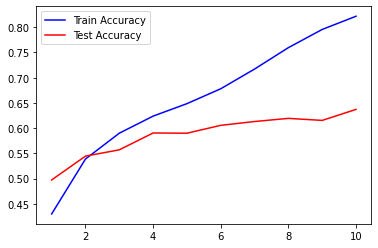

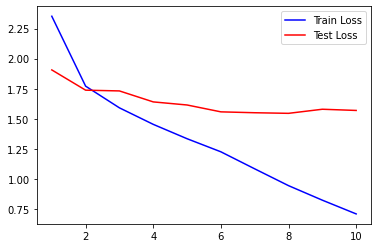

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'b',label='Train Accuracy')
plt.plot(epochs, val_acc, 'r',label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()